# Prueba del mejor algoritmo de aprendizaje automático para la predicción.

Este notebook o libro, tarda unos 40 minutos en ejecutarse, pero ya lo hemos ejecutado y guardado los datos por usted. Sin embargo, léalo para que entienda cómo llegamos a las conclusiones que usaremos en el futuro. k takes about 40 minutes to run, but we've already run it and saved the data for you. Please read through it, though, so that you understand how we came to the conclusions we'll use moving forward.

## Seis algoritmos

Vamos a comparar seis algoritmos diferentes para determinar el mejor para producir un modelo preciso para nuestras predicciones.

### Regresión logística

La Regresión Logística (LR) es una técnica tomada del campo de la estadística. Es el método de consulta para problemas de clasificación binaria (problemas con dos valores de clase).

![](./docs/logisticfunction.png)

La regresión logística se llama así por la función utilizada en el interior del método: La función logística. La función logística es un método probablístico utilizado para determinar si el conductor será o no el ganador. La regresión logística predice probabilidades.

### Decision Tree (Árbol de decisión)

Un árbol tiene muchas analogías en la vida real, y resulta que ha influido en una amplia área del aprendizaje automático, que abarca tanto la clasificación como la regresión. En el análisis de decisiones, un árbol de decisiones se puede utilizar para representar visual y explícitamente las decisiones y la toma de decisiones.
![](./docs/decisiontree.png)

Esta metodología se conoce más comúnmente como un "árbol de decisión" a partir de datos, y el árbol de la gráfica anterior se llama árbol de clasificación porque el objetivo es clasificar a un conductor como ganador o no.
### Random Forest

Random forest es un algoritmo de aprendizaje supervisado. El "bosque" que construye es un **conjunto de árboles de decisión**, generalmente entrenados con el método " bagging ", una combinación de modelos de aprendizaje que aumenta la precisión del resultado.
Un bosque aleatorio erradica las limitaciones de un algoritmo de árbol de decisión. Reduce el sobreajuste de los conjuntos de datos y aumenta la precisión. Genera predicciones sin requerir muchas configuraciones.

![](./docs/randomforest.png)

Esta es la diferencia entre los métodos árbol de decisión y bosque aleatorio:

![](./docs/treefortheforest.jpg)

### Support Vector Machine Algorithm (SVC)

Support Vector Machines (SVMs) son un conjunto de métodos de aprendizaje supervisado utilizados para la clasificación, regresión y detección de valores atípicos.

Las ventajas de las máquinas vectoriales de soporte son:

- Eficaz en espacios de alta dimensión
- Sigue siendo eficaz en los casos en que el número de dimensiones es mayor que el número de muestras.
- Utiliza un subconjunto de puntos de entrenamiento en la función de decisión (llamados vectores de apoyo), por lo que también es eficiente en memoria.
- Versátil: se pueden especificar diferentes funciones del kernel para la función de decisión. Se proporcionan núcleos comunes, pero también es posible especificar núcleos personalizados.

El objetivo de un SVC  (Support Vector Classifier) es ajustarse a los datos que proporciona, devolviendo un hiperplano de "mejor ajuste" que divide o categoriza sus datos.

### Gaussian Naive Bayes Algorithm

Naive Bayes es un algoritmo de clasificación para problemas de clasificación binarios (dos clases) y multi-clase. La técnica es más fácil de entender cuando se describe utilizando valores de entrada binarios o categóricos. La representación utilizada para el naive Bayes son las probabilidades.

Una lista de probabilidades se almacena en un archivo para un modelo de Naive Bayes. Esto incluye:

- **Class Probabilities:** Las probabilidades de cada clase en el conjunto de datos de entrenamiento.
- **Conditional Probabilities:** Las probabilidades condicionales de cada valor de entrada dado cada valor de clase.

Naive Bayes se puede extender a atributos de valor real, más comúnmente asumiendo una distribución gaussiana. Esta extensión de Naive Bayes se llama Gaussian Naive Bayes. Se pueden usar otras funciones para estimar la distribución de los datos, pero la distribución gaussiana (o normal) es la más fácil de trabajar porque solo necesita estimar la media y la desviación estándar de sus datos de entrenamiento.

### k Nearest Neighbor Algorithm (kNN)

El k-Nearest Neighbors (KNN) es un algoritmo de aprendizaje automático simple y supervisado que se puede usar para resolver problemas de clasificación y regresión.

KNN funciona encontrando las distancias entre una consulta y todos los ejemplos en los datos, seleccionando los ejemplos de números especificados (k) más cercanos a la consulta, luego votando por la etiqueta más frecuente (en el caso de la clasificación) o promediando las etiquetas (en el caso de la regresión).

El algoritmo kNN asume la similitud entre el nuevo caso/datos y los casos disponibles, y coloca el nuevo caso en la categoría que es más similar a las categorías disponibles.

![](./docs/knn.png)

## Análisis de los datos

### Importancia de las características o variables.

Otra gran cualidad del algoritmo de los bosque aleatorios (random forest) es que es fácil medir la importancia relativa de cada característica para la predicción.

La biblioteca Python Scikit-learn proporciona una gran herramienta para esto que mide la importancia de una característica al observar cuánto reducen la impureza los nodos de árbol que usan esa característica en todos los árboles del bosque. Calcula esta puntuación automáticamente para cada característica después del entrenamiento y escala los resultados para que la suma de toda la importancia sea igual a una.

### Visualización de datos al crear un modelo

¿Cómo visualizas la influencia de los datos? ¿Cómo se enmarca el problema?

Una herramienta importante en el kit de herramientas del científico de datos es el poder de visualizar datos utilizando varias bibliotecas excelentes como Seaborn o MatPlotLib. Representar sus datos visualmente podría permitirle descubrir correlaciones ocultas que puede aprovechar. Sus visualizaciones también pueden ayudarlo a descubrir sesgos o datos desequilibrado.

![](./docs/visualization.png)

### División del conjunto de datos


Antes del entrenamiento, se debe dividir su conjunto de datos en dos o más partes de tamaño desigual que aún representen bien los datos.

1. Training. Esta parte del conjunto de datos se ajusta a su modelo para entrenarlo. Este conjunto constituye la mayoría del conjunto de datos original.
2. Testing. Un conjunto de datos de prueba es un grupo independiente de datos, a menudo un subconjunto de los datos originales, que se utiliza para confirmar el rendimiento del modelo que ha creado.
3. Validating. Un conjunto de validación es un grupo independi
ente más pequeño de ejemplos que se utiliza para ajustar los hiperparámetros o la arquitectura del modelo para mejorar el modelo. Dependiendo del tamaño de sus datos y de la pregunta que esté haciendo, es posible que no necesite crear este tercer conjunto.

## Creación del modelo

Usando sus datos de entrenamiento, su objetivo es construir un modelo, o una representación estadística de sus datos, utilizando varios algoritmos para entrenarlos. Entrenar un modelo lo expone a los datos y le permite hacer suposiciones sobre los patrones percibidos que descubre, valida y acepta o rechaza.

### Decidir sobre un método de entrenamiento

Dependiendo de su pregunta y la naturaleza de sus datos, elegirá un método para entrenarlo. Al revisar la documentación de Scikit-learn, puede explorar muchas formas de entrenar a un modelo. Dependiendo de los resultados que obtenga, es posible que tenga que probar varios métodos diferentes para crear el mejor modelo. Es probable que pase por un proceso mediante el cual los científicos de datos evalúan el rendimiento de un modelo alimentándolo con datos no vistos por el modelo, verificando la precisión, el sesgo y otros problemas que degradan la calidad, y seleccionando el método de entrenamiento más adecuado para la tarea en cuestión.

### Entrenar un modelo

Armado con sus datos de entrenamiento, está listo para "aprender" y para crear un modelo. En muchas bibliotecas de ML encontrará el código 'model.fit': es en este momento que envía sus datos como una matriz de valores (generalmente 'X') y una variable de característica (generalmente 'y').

### Evaluate the Model

Una vez que se complete el proceso de entrenamiento, podrá evaluar la calidad del modelo utilizando datos de prueba para medir su rendimiento. Estos datos son un subconjunto de los datos originales que el modelo no ha analizado previamente. Puede imprimir una tabla de métricas sobre la calidad de su modelo.

####  Ajuste del modelo

En el contexto del aprendizaje automático, el ajuste del modelo se refiere a la precisión de la función subyacente del modelo, ya que intenta analizar datos con los que no está familiarizado.

#### Subajuste y sobreajuste

El subajuste y el sobreajuste son problemas comunes que degradan la calidad del modelo, ya que el modelo no se ajusta lo suficientemente bien o se ajusta demasiado bien. Esto hace que el modelo haga predicciones demasiado alineadas o demasiado poco alineadas con sus datos de entrenamiento. Un modelo de sobreajuste predice demasiado bien los datos de entrenamiento porque ha aprendido demasiado bien los detalles y el ruido de los datos. Un modelo de subacondicionamiento no es preciso, ya que no puede analizar con precisión sus datos de entrenamiento ni los datos que aún no ha "visto".

![](./docs/overfit.png)

Probemos algunos algoritmos para elegir nuestra ruta para modelar nuestras predicciones

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import time
start = time.time()

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from sklearn.metrics import confusion_matrix, precision_score
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler,LabelEncoder,OneHotEncoder
from sklearn.model_selection import cross_val_score,StratifiedKFold,RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix,precision_score,f1_score,recall_score
from sklearn.neural_network import MLPClassifier, MLPRegressor
plt.style.use('seaborn')

np.set_printoptions(precision=4)

In [4]:
data = pd.read_csv('./data_f1/data_filtered.csv')

In [5]:
data.head()

,year,date,quali_pos,statusId,position,dob,driver_nationality,constructor,constructor_nationality,GP_name,country,driver,age_at_gp_in_days,driver_home,constructor_home,driver_dnf,constructor_dnf
0,2011,2011-03-27,18,11,18,1977-05-10,Ger,Alpine F1,Fre,Albert Park Grand Prix Circuit,Aus,Nick Heidfeld,12374,0,0,0,1
1,2010,2010-03-28,9,1,9,1984-12-07,Pol,Alpine F1,Fre,Albert Park Grand Prix Circuit,Aus,Robert Kubica,9242,0,0,0,0
2,2017,2017-03-26,11,11,12,1987-08-19,Ger,Alpine F1,Fre,Albert Park Grand Prix Circuit,Aus,Nico Hülkenberg,10812,0,0,0,1
3,2018,2018-03-25,7,1,8,1987-08-19,Ger,Alpine F1,Fre,Albert Park Grand Prix Circuit,Aus,Nico Hülkenberg,11176,0,0,0,0
4,2019,2019-03-17,11,11,11,1987-08-19,Ger,Alpine F1,Fre,Albert Park Grand Prix Circuit,Aus,Nico Hülkenberg,11533,0,0,0,1


In [6]:
len(data)

4923

In [9]:
#Metricas de confianza conductores
dnf_by_driver = data.groupby('driver').sum()['driver_dnf']
driver_race_entered = data.groupby('driver').count()['driver_dnf']
driver_dnf_ratio = (dnf_by_driver/driver_race_entered)
driver_confidence = 1-driver_dnf_ratio
driver_confidence_dict = dict(zip(driver_confidence.index,driver_confidence))

In [10]:
driver_confidence_dict

{'Adrian Sutil': 0.868421052631579,
 'Alexander Albon': 0.972972972972973,
 'Alexander Rossi': 1.0,
 'André Lotterer': 1.0,
 'Antonio Giovinazzi': 0.9090909090909091,
 'Brendon Hartley': 0.88,
 'Bruno Senna': 0.8260869565217391,
 'Carlos Sainz': 0.9104477611940298,
 'Charles Leclerc': 0.8666666666666667,
 'Charles Pic': 0.9487179487179487,
 'Christian Klien': 1.0,
 'Daniel Ricciardo': 0.9507389162561576,
 'Daniil Kvyat': 0.9196428571428571,
 'Esteban Gutiérrez': 0.847457627118644,
 'Esteban Ocon': 0.9390243902439024,
 'Felipe Massa': 0.9161290322580645,
 'Felipe Nasr': 0.925,
 'Fernando Alonso': 0.9312169312169312,
 'George Russell': 0.9259259259259259,
 'Giedo van der Garde': 0.8421052631578947,
 'Heikki Kovalainen': 0.95,
 'Jack Aitken': 1.0,
 'Jaime Alguersuari': 0.9210526315789473,
 'Jarno Trulli': 0.972972972972973,
 'Jean-Éric Vergne': 0.9137931034482758,
 'Jenson Button': 0.9407407407407408,
 'Jolyon Palmer': 0.8571428571428572,
 'Jules Bianchi': 0.9117647058823529,
 "Jérôme d'A

In [11]:
dnf_by_constructor = data.groupby('constructor').sum()['constructor_dnf']
constructor_race_entered = data.groupby('constructor').count()['constructor_dnf']
constructor_dnf_ratio = (dnf_by_constructor/constructor_race_entered)
constructor_reliability = 1-constructor_dnf_ratio
constructor_reliability_dict = dict(zip(constructor_reliability.index,constructor_reliability))

In [12]:
constructor_reliability_dict

{'Alfa Romeo': 0.4213973799126638,
 'AlphaTauri': 0.4771241830065359,
 'Alpine F1': 0.537117903930131,
 'Aston Martin': 0.613882863340564,
 'Caterham': 0.1785714285714286,
 'Ferrari': 0.8766233766233766,
 'HRT': 0.15652173913043477,
 'Haas F1 Team': 0.35064935064935066,
 'Lotus': 0.07894736842105265,
 'Manor Marussia': 0.12121212121212122,
 'Marussia': 0.16666666666666663,
 'McLaren': 0.6122004357298475,
 'Mercedes': 0.8872017353579176,
 'Red Bull': 0.8347826086956522,
 'Virgin': 0.09210526315789469,
 'Williams': 0.4859002169197397}

In [13]:
data['driver_confidence'] = data['driver'].apply(lambda x:driver_confidence_dict[x])
data['constructor_reliability'] = data['constructor'].apply(lambda x:constructor_reliability_dict[x])
#Constructores actuales.
active_constructors = ['Alpine F1', 'Williams', 'McLaren', 'Ferrari', 'Mercedes',
                       'AlphaTauri', 'Aston Martin', 'Alfa Romeo', 'Red Bull',
                       'Haas F1 Team']
active_drivers = ['Daniel Ricciardo', 'Mick Schumacher', 'Carlos Sainz',
                  'Valtteri Bottas', 'Lance Stroll', 'George Russell',
                  'Lando Norris', 'Sebastian Vettel', 'Kimi Räikkönen',
                  'Charles Leclerc', 'Lewis Hamilton', 'Yuki Tsunoda',
                  'Max Verstappen', 'Pierre Gasly', 'Fernando Alonso',
                  'Sergio Pérez', 'Esteban Ocon', 'Antonio Giovinazzi',
                  'Nikita Mazepin','Nicholas Latifi']
data['active_driver'] = data['driver'].apply(lambda x: int(x in active_drivers))
data['active_constructor'] = data['constructor'].apply(lambda x: int(x in active_constructors))

In [16]:
data.tail()

,year,date,quali_pos,statusId,position,dob,driver_nationality,constructor,constructor_nationality,GP_name,...,driver,age_at_gp_in_days,driver_home,constructor_home,driver_dnf,constructor_dnf,driver_confidence,constructor_reliability,active_driver,active_constructor
4918,2021,2021-09-05,7,12,7,1993-12-14,Ita,Alfa Romeo,Swi,Circuit Park Zandvoort,...,Antonio Giovinazzi,10127,0,0,0,1,0.909091,0.421397,1,1
4919,2021,2021-09-05,17,13,19,1999-03-22,Ger,Haas F1 Team,Ame,Circuit Park Zandvoort,...,Mick Schumacher,8203,0,0,0,1,1.000000,0.350649,1,1
4920,2021,2021-09-05,18,9,20,1999-03-02,Rus,Haas F1 Team,Ame,Circuit Park Zandvoort,...,Nikita Mazepin,8223,0,0,0,1,0.875000,0.350649,1,1
4921,2021,2021-09-05,4,11,4,1996-02-07,Fre,AlphaTauri,Ita,Circuit Park Zandvoort,...,Pierre Gasly,9342,0,0,0,1,0.924051,0.477124,1,1
4922,2021,2021-09-05,14,131,15,2000-05-11,Jap,AlphaTauri,Ita,Circuit Park Zandvoort,...,Yuki Tsunoda,7787,0,0,0,1,1.000000,0.477124,1,1


In [17]:
data.columns

Index(['year', 'date', 'quali_pos', 'statusId', 'position', 'dob',
       'driver_nationality', 'constructor', 'constructor_nationality',
       'GP_name', 'country', 'driver', 'age_at_gp_in_days', 'driver_home',
       'constructor_home', 'driver_dnf', 'constructor_dnf',
       'driver_confidence', 'constructor_reliability', 'active_driver',
       'active_constructor'],
      dtype='object')

## Directory to store Models

In [18]:
import os
if not os.path.exists('./models'):
    os.mkdir('./models')

In [19]:
def position_index(x):
    if x<4:
        return 1
    if x>10:
        return 3
    else :
        return 2

## Model considering only Drivers

In [20]:
x_d= data[['GP_name','quali_pos','driver','age_at_gp_in_days','position','driver_confidence','active_driver']]

In [21]:
x_d = x_d[x_d['active_driver']==1]

In [22]:
sc  = StandardScaler()
le = LabelEncoder()
x_d['GP_name'] = le.fit_transform(x_d['GP_name'])
x_d['driver'] = le.fit_transform(x_d['driver'])
x_d['GP_name'] = le.fit_transform(x_d['GP_name'])
x_d['age_at_gp_in_days'] = sc.fit_transform(x_d[['age_at_gp_in_days']])
X_d = x_d.drop(['position','active_driver'],1)
y_d = x_d['position'].apply(lambda x: position_index(x))

In [24]:
#cross validation for diffrent models
models = [LogisticRegression(),DecisionTreeClassifier(),RandomForestClassifier(),SVC(),GaussianNB(),KNeighborsClassifier()]
names = ['LogisticRegression','DecisionTreeClassifier','RandomForestClassifier','SVC','GaussianNB','KNeighborsClassifier']
model_dict = dict(zip(models,names))
mean_results_dri = []
results_dri = []
name = []
for model in models:
    cv = StratifiedKFold(n_splits=10,random_state=1,shuffle=True)
    result = cross_val_score(model,X_d,y_d,cv=cv,scoring='accuracy')
    mean_results_dri.append(result.mean())
    results_dri.append(result)
    name.append(model_dict[model])
    print(f'{model_dict[model]} : {result.mean()}')

LogisticRegression : 0.9235721804218159
DecisionTreeClassifier : 0.9143035359245253
RandomForestClassifier : 0.9394818915441894
SVC : 0.9249035125336246
GaussianNB : 0.8626330357490936
KNeighborsClassifier : 0.9085649682273595


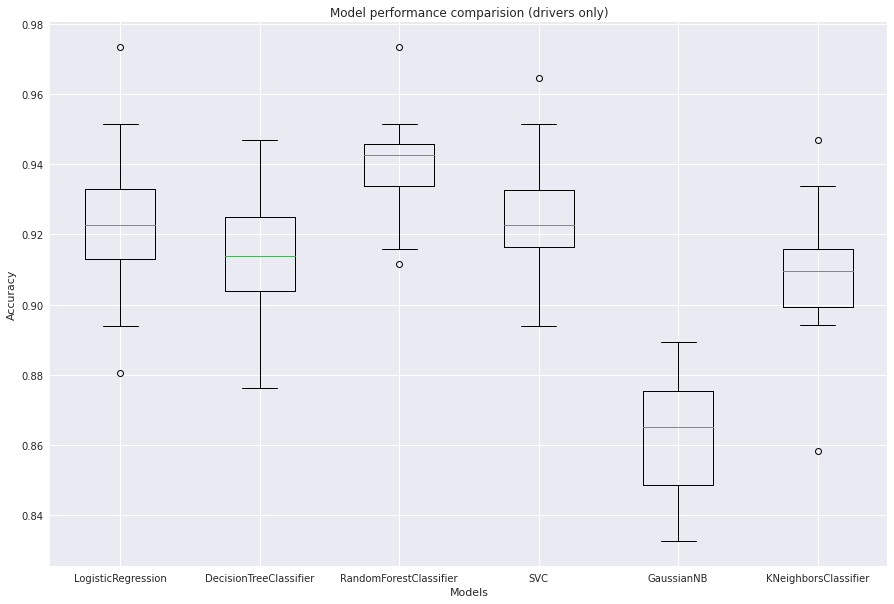

In [25]:
plt.figure(figsize=(15,10))
plt.boxplot(x=results_dri,labels=name)
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Model performance comparision (drivers only)')
plt.show()

## Model considering only Constructors

In [26]:
x_c = data[['GP_name','quali_pos','constructor','position','constructor_reliability','active_constructor']]

In [27]:
x_c = x_c[x_c['active_constructor']==1]

In [28]:
sc  = StandardScaler()
le = LabelEncoder()
x_c['GP_name'] = le.fit_transform(x_c['GP_name'])
x_c['constructor'] = le.fit_transform(x_c['constructor'])
X_c = x_c.drop(['position','active_constructor'],1)
y_c = x_c['position'].apply(lambda x: position_index(x))

In [29]:
#cross validation for diffrent models
models = [LogisticRegression(),DecisionTreeClassifier(),RandomForestClassifier(),SVC(),GaussianNB(),KNeighborsClassifier()]
names = ['LogisticRegression','DecisionTreeClassifier','RandomForestClassifier','SVC','GaussianNB','KNeighborsClassifier']
model_dict = dict(zip(models,names))
mean_results_const = []
results_const = []
name = []
for model in models:
    cv = StratifiedKFold(n_splits=10,random_state=1,shuffle=True)
    result = cross_val_score(model,X_c,y_c,cv=cv,scoring='accuracy')
    mean_results_const.append(result.mean())
    results_const.append(result)
    name.append(model_dict[model])
    print(f'{model_dict[model]} : {result.mean()}')

LogisticRegression : 0.9295194508009154
DecisionTreeClassifier : 0.9281464530892449
RandomForestClassifier : 0.9402745995423342
SVC : 0.9473684210526316
GaussianNB : 0.8508009153318078
KNeighborsClassifier : 0.9331807780320366


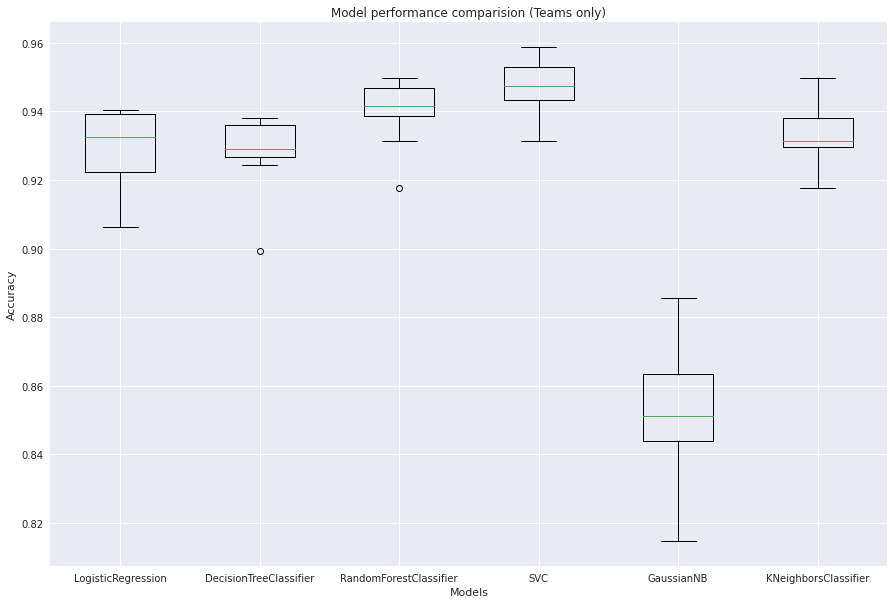

In [30]:
plt.figure(figsize=(15,10))
plt.boxplot(x=results_const,labels=name)
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Model performance comparision (Teams only)')
plt.show()

#  Modelo que considera tanto a los controladores como a los constructores

In [31]:
cleaned_data = data[['GP_name','quali_pos','constructor','driver','position','driver_confidence','constructor_reliability','active_driver','active_constructor']]
cleaned_data = cleaned_data[(cleaned_data['active_driver']==1)&(cleaned_data['active_constructor']==1)]
cleaned_data.to_csv('./data_f1/cleaned_data.csv',index=False)

### Cree su conjunto de datos X con las siguientes columnas:
- GP_name
- quali_pos to predict the classification cluster (1,2,3) 
- constructor
- driver
- position
- driver confidence
- constructor_reliability
- active_driver
- active_constructor

In [32]:
x = data[['GP_name','quali_pos','constructor','driver','position','driver_confidence','constructor_reliability','active_driver','active_constructor']]

### Filtrar el conjunto de datos para este modelo "Driver + Constructor" todos los conductores y constructores activos


In [33]:
x = x[(x['active_constructor']==1) & (x['active_driver']==1)]

### Crear escalador estándar y codificador de etiquetas para las diferentes características con el fin de tener una escala similar para todas las características

In [34]:
sc  = StandardScaler()
le = LabelEncoder()
x['GP_name'] = le.fit_transform(x['GP_name'])
x['constructor'] = le.fit_transform(x['constructor'])
x['driver'] = le.fit_transform(x['driver'])
x['GP_name'] = le.fit_transform(x['GP_name'])

### Prepare X (conjunto de datos de características) e y para el valor previsto. 
En nuestro caso, queremos calcular el clúster de posición final para el conductor utilizando la función "position_index"

In [35]:
# Implement X, y
X = x.drop(['position','active_driver','active_constructor'],1)
y = x['position'].apply(lambda x: position_index(x))

### Aplicar la misma lista de algoritmos de ML para la validación cruzada de diferentes modelos

 almacene el valor medio de precisión para compararlo con los modelos de ML anteriores

In [37]:
mean_results = []
results = []
name = []

In [38]:
# cross validation for different models
models = [LogisticRegression(),DecisionTreeClassifier(),RandomForestClassifier(),SVC(),GaussianNB(),KNeighborsClassifier()]
names = ['LogisticRegression','DecisionTreeClassifier','RandomForestClassifier','SVC','GaussianNB','KNeighborsClassifier']
model_dict = dict(zip(models,names))
for model in models:
    cv = StratifiedKFold(n_splits=10,random_state=1,shuffle=True)
    result = cross_val_score(model,X,y,cv=cv,scoring='accuracy')
    mean_results.append(result.mean())
    results.append(result)
    name.append(model_dict[model])
    print(f'{model_dict[model]} : {result.mean()}')


LogisticRegression : 0.9064464285714285
DecisionTreeClassifier : 0.9095753968253968
RandomForestClassifier : 0.9314047619047618
SVC : 0.9131448412698411
GaussianNB : 0.837404761904762
KNeighborsClassifier : 0.8864047619047618


### Graficar

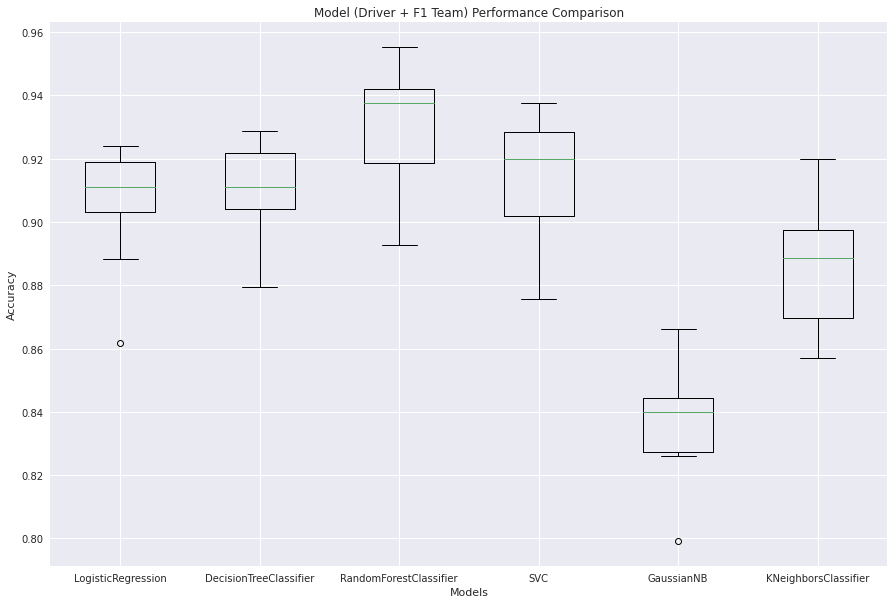

In [39]:
# Implement boxplot
plt.figure(figsize=(15,10))
plt.boxplot(x=results,labels=name)
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Model (Driver + F1 Team) Performance Comparison')
plt.show()

# Comparing The 3 ML Models

Let's see mean score of our three assumptions.

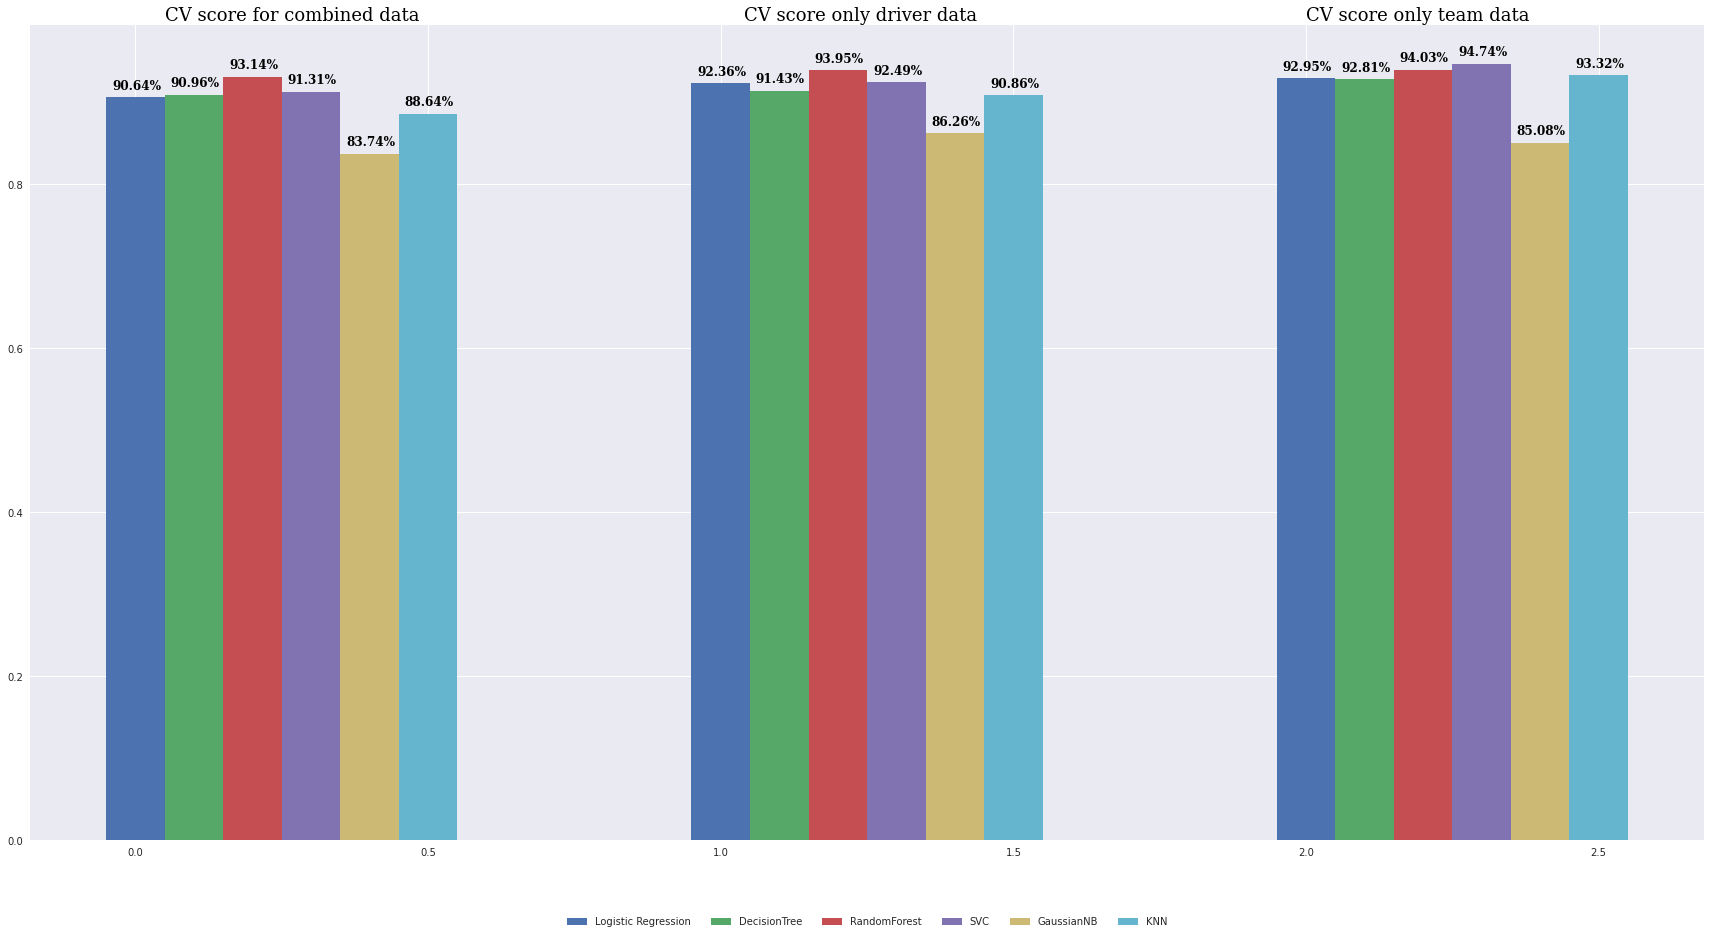

In [40]:
lr = [mean_results[0],mean_results_dri[0],mean_results_const[0]]
dtc = [mean_results[1],mean_results_dri[1],mean_results_const[1]]
rfc = [mean_results[2],mean_results_dri[2],mean_results_const[2]]
svc = [mean_results[3],mean_results_dri[3],mean_results_const[3]]
gnb = [mean_results[4],mean_results_dri[4],mean_results_const[4]]
knn = [mean_results[5],mean_results_dri[5],mean_results_const[5]]
font1 = {
    'family':'serif',
    'color':'black',
    'weight':'normal',
    'size':18
}
font2 = {
    'family':'serif',
    'color':'black',
    'weight':'bold',
    'size':12
}
x_ax = np.arange(3)
plt.figure(figsize=(30,15))
bar1 = plt.bar(x_ax,lr,width=0.1,align='center', label="Logistic Regression")
bar2 = plt.bar(x_ax+0.1,dtc,width=0.1,align='center', label="DecisionTree")
bar3 = plt.bar(x_ax+0.2,rfc,width=0.1,align='center',  label="RandomForest")
bar4 = plt.bar(x_ax+0.3,svc,width=0.1,align='center', label="SVC")
bar5 = plt.bar(x_ax+0.4,gnb,width=0.1,align='center', label="GaussianNB")
bar6 = plt.bar(x_ax+0.5,knn,width=0.1,align='center', label="KNN")
plt.text(0.05,1,'CV score for combined data',fontdict=font1)
plt.text(1.04,1,'CV score only driver data',fontdict=font1)
plt.text(2,1,'CV score only team data',fontdict=font1)
for bar in bar1.patches:
    yval = bar.get_height()
    plt.text(bar.get_x()+0.01,yval+0.01,f'{round(yval*100,2)}%',fontdict=font2)
for bar in bar2.patches:
    yval = bar.get_height()
    plt.text(bar.get_x()+0.01,yval+0.01,f'{round(yval*100,2)}%',fontdict=font2)
for bar in bar3.patches:
    yval = bar.get_height()
    plt.text(bar.get_x()+0.01,yval+0.01,f'{round(yval*100,2)}%',fontdict=font2)
for bar in bar4.patches:
    yval = bar.get_height()
    plt.text(bar.get_x()+0.01,yval+0.01,f'{round(yval*100,2)}%',fontdict=font2)
for bar in bar5.patches:
    yval = bar.get_height()
    plt.text(bar.get_x()+0.01,yval+0.01,f'{round(yval*100,2)}%',fontdict=font2)
for bar in bar6.patches:
    yval = bar.get_height()
    plt.text(bar.get_x()+0.01,yval+0.01,f'{round(yval*100,2)}%',fontdict=font2)
plt.legend(loc='center', bbox_to_anchor=(0.5, -0.10), shadow=False, ncol=6)

plt.show()

In [41]:
end = time.time()

In [42]:
import datetime
str(datetime.timedelta(seconds=(end - start)))

'0:32:12.366186'

In [43]:
print(str(end - start)+" seconds")

1932.3661856651306 seconds
